# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

https://github.com/DKudryavtsev/SkillFactory-Tasks/tree/main/task_06-optimization

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [59]:
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [60]:
data.isna().mean()
# Пропусков нет

Unnamed: 0    0.0
TV            0.0
radio         0.0
newspaper     0.0
sales         0.0
dtype: float64

In [61]:
data.info()
# Пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [67]:
X = np.array(data.drop(columns=['Unnamed: 0', 'sales']))
y = np.array(data['sales'])

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [68]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

print(X.shape, y.shape)

(200, 4) (200,)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [69]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм:**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
    $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}$$
    $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
    
    или в векторном виде:
    
    $$\hat{y} = Xw$$
    $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [70]:
w = np.zeros(4)
r = y

for i in range(1000):
    for j in range(X.shape[1]):
        r = r + X[:,j]*w[j]
        w[j] = X[:,j]@r
        r = r - X[:,j]*w[j]
                
print(w)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [71]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [72]:
X = np.array(data.drop(columns=['Unnamed: 0', 'sales']))
y = np.array(data['sales'])

X = (X-np.mean(X, axis=0)) / np.std(X, axis=0)

**Добавим единичный столбец**

In [73]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [74]:
def mse_error(y_true, y_pred):
    return np.sum((y_true-y_pred)**2) / len(y_true)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [75]:
y_pred = np.ones(len(y)) * np.mean(y)
mse_error(y, y_pred)

27.085743750000002

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [76]:
def lin_pred(X, w):
    return X@w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [77]:
def stoch_grad_step(X, y, w, train_ind, eta):
    w = w.copy()
    x = X[train_ind,:]
    w -= 2 * eta * x * (x@w-y[train_ind])
    return w

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [78]:
def stochastic_gradient_descent(X, y, w, eta, max_iter, tol):
    w = w.copy()
    dist = np.inf  # расстояние между векторами
    mse_list = []  # список ошибок
    iter_count = 0  # счетчик итераций
    
    while dist>tol and iter_count<max_iter:
        train_ind = np.random.randint(len(y))
        w_new = stoch_grad_step(X, y, w, train_ind, eta)
        mse_list.append(mse_error(y, lin_pred(X, w_new)))
        dist = np.linalg.norm(w_new - w)
        w = w_new
        iter_count += 1 
    
    return w, mse_list

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

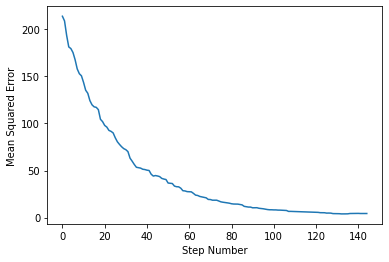

In [79]:
w = np.zeros(X.shape[1]) # начальные веса
eta = 0.01               # темп обучения
max_iter = 1E5           # максимальное кол-во итераций
tol = 1E-3               # критерий остановки (расстояние между векторами)
np.random.seed(42)
w, mse_list = stochastic_gradient_descent(X, y, w, eta, max_iter, tol)

plt.plot(list(range(len(mse_list))), mse_list)
plt.xlabel('Step Number')
plt.ylabel('Mean Squared Error');

**Выведите вектор весов, к которому сошелся метод.**

In [80]:
print(w)

[13.14942188  3.73937733  2.57176943  0.93417699]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [81]:
print(mse_list[-1])

4.37816719806449


**Выводы**

Без применения библиотек машинного обучения реализованы простые алгоритмы координатного и стохастического спусков для решения задачи линейной регрессии на реальном датасете. Полученные значения параметров линейной регрессии в целом совпадают с вычисленными с помощью специализированных библиотек. Продемонстрирован процесс минимизации функции потерь (MSE) в алгоритме стохастического спуска. Полученное оптимальное значение MSE\~4 существенно лучше наивного прогноза (MSE\~27).